<a href="https://colab.research.google.com/github/myjjojjojjo/Lesson/blob/main/%EC%97%B0%EC%8A%B5_3%ED%9A%8C%EA%B8%B0%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

import time

In [ ]:
df=pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
df.tail()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.0
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.0
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.0
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.0
19999,1,Non Refund,40.0,0,2,0.0,0,0,0,0,130.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [ ]:
df.is_canceled.value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

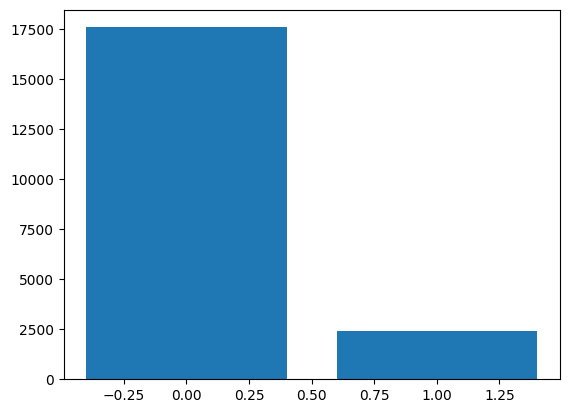

In [ ]:
plt.bar(df.is_canceled.value_counts().index,df.is_canceled.value_counts().values)  # 칼럼 하나
plt.show()

<Axes: xlabel='is_canceled', ylabel='count'>

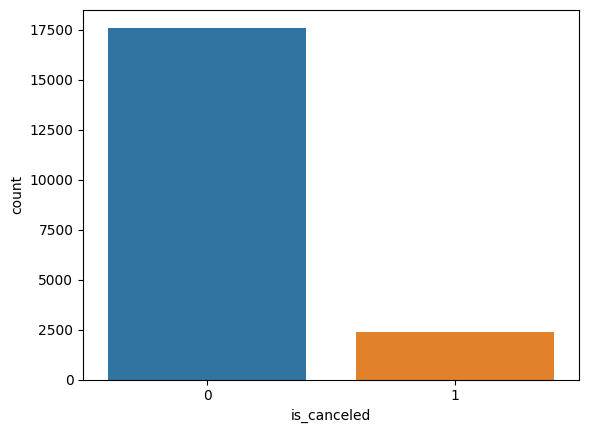

In [ ]:
sns.countplot(x=df.is_canceled,data=df)                                           # 칼럼 하나

In [ ]:
# sns.barplot(data=df,x=df.is_canceled,y=df.BloodPressure)                             # 2개 칼럼

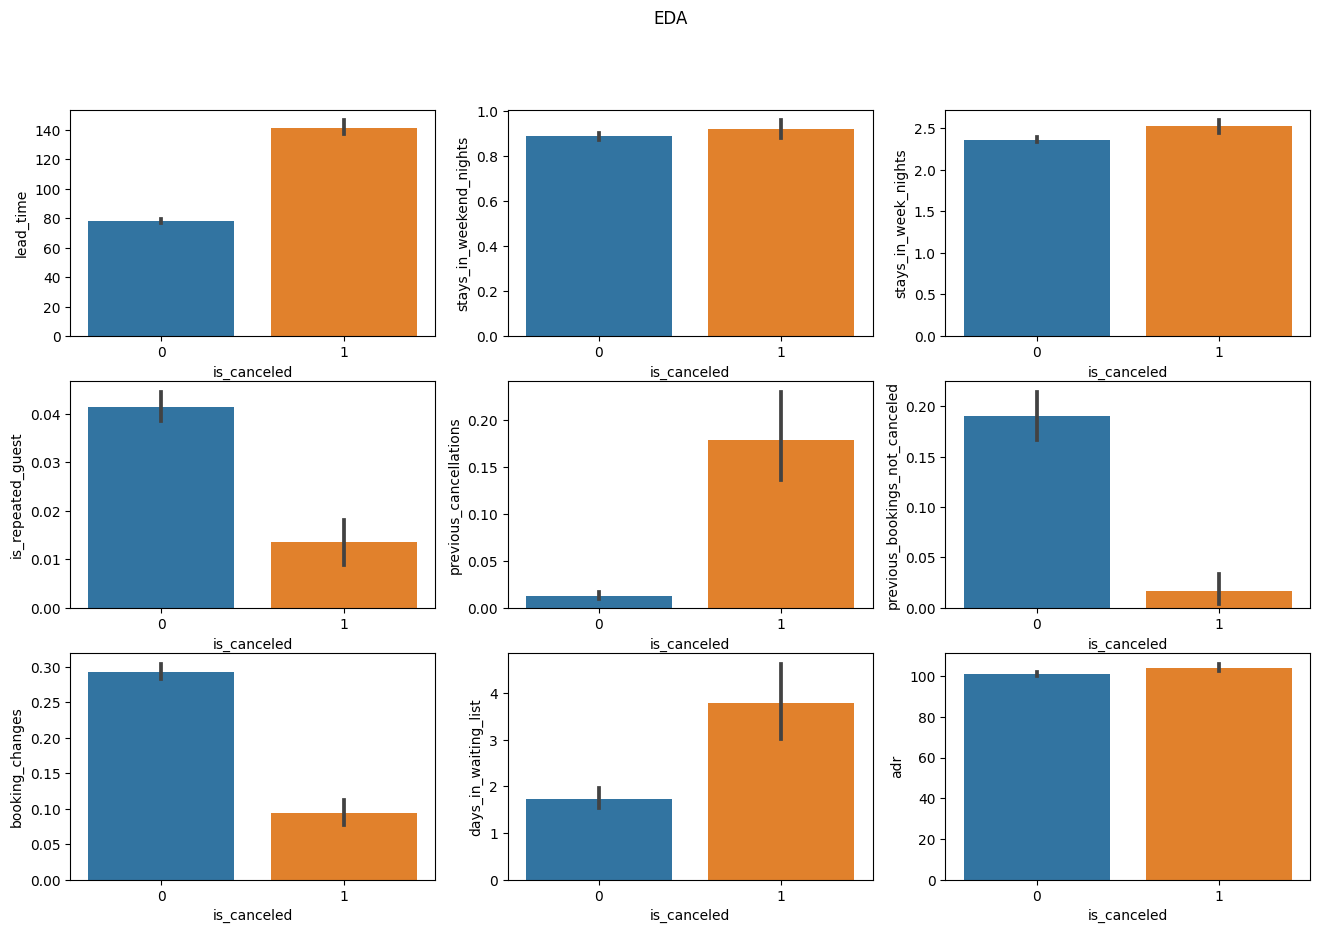

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(16,10))
sns.barplot(data=df,x=df.is_canceled,y=df.lead_time,ax=axes[0][0])
sns.barplot(data=df,x=df.is_canceled,y=df.stays_in_weekend_nights,ax=axes[0][1])
sns.barplot(data=df,x=df.is_canceled,y=df.stays_in_week_nights,ax=axes[0][2])
sns.barplot(data=df,x=df.is_canceled,y=df.is_repeated_guest,ax=axes[1][0])
sns.barplot(data=df,x=df.is_canceled,y=df.previous_cancellations,ax=axes[1][1])
sns.barplot(data=df,x=df.is_canceled,y=df.previous_bookings_not_canceled,ax=axes[1][2])
sns.barplot(data=df,x=df.is_canceled,y=df.booking_changes,ax=axes[2][0])
sns.barplot(data=df,x=df.is_canceled,y=df.days_in_waiting_list,ax=axes[2][1])
sns.barplot(data=df,x=df.is_canceled,y=df.adr,ax=axes[2][2])
plt.suptitle('EDA')
plt.show()

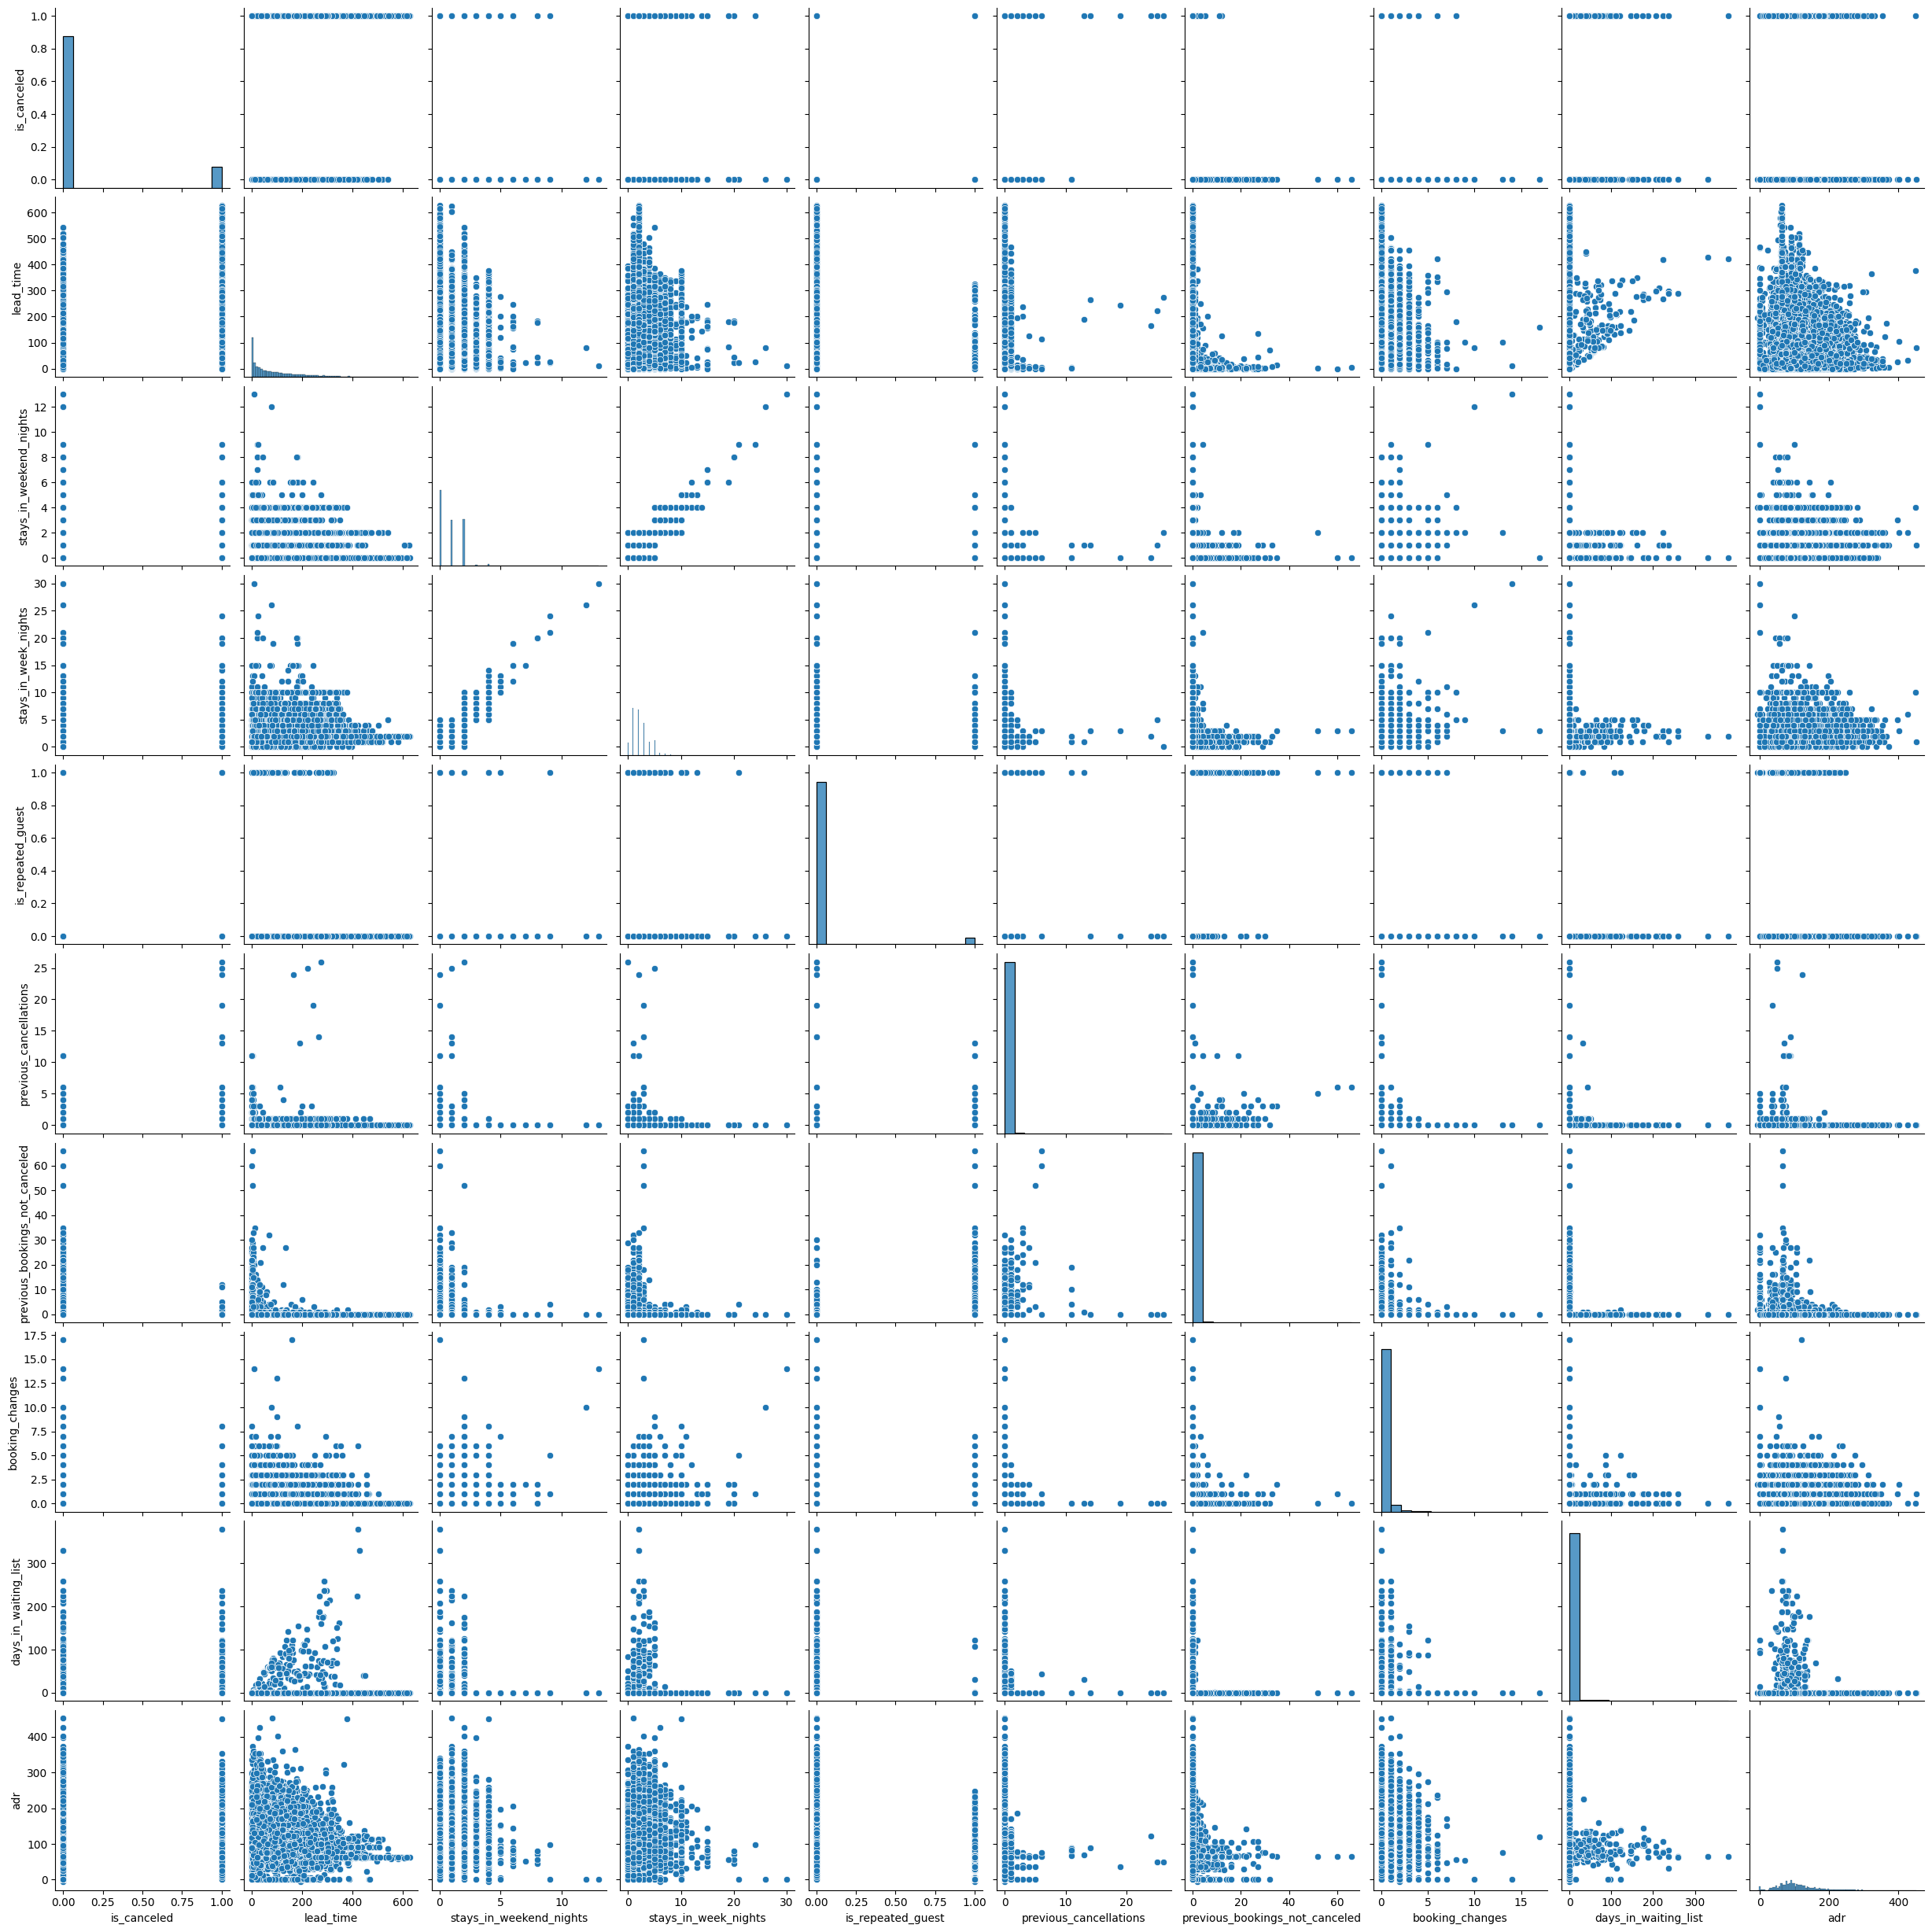

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.deposit_type.value_counts()

No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64

In [ ]:
df.groupby('deposit_type')['is_canceled','lead_time','is_repeated_guest','adr'].mean()

<ipython-input-12-ba096ff96bff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('deposit_type')['is_canceled','lead_time','is_repeated_guest','adr'].mean()


,is_canceled,lead_time,is_repeated_guest,adr
deposit_type,,,,
No Deposit,0.082872,80.665290,0.039521,101.965190
Non Refund,0.976019,205.193046,0.007362,89.689476
Refundable,0.000000,165.607143,0.000000,67.456154


<BarContainer object of 3 artists>

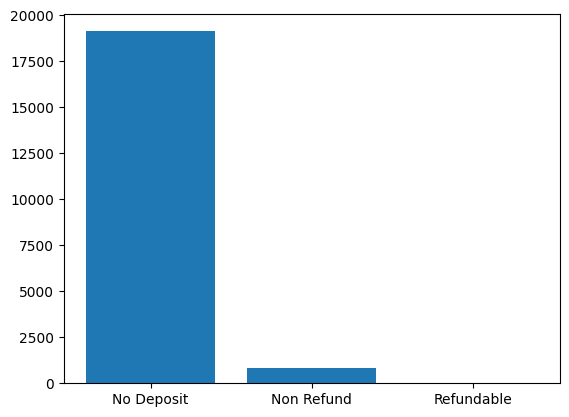

In [ ]:
plt.bar(df.deposit_type.value_counts().index,df.deposit_type.value_counts().values)

<Axes: xlabel='deposit_type', ylabel='count'>

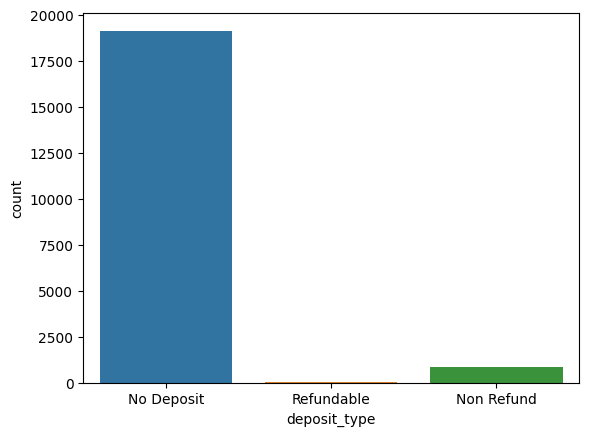

In [ ]:
sns.countplot(data=df,x='deposit_type')

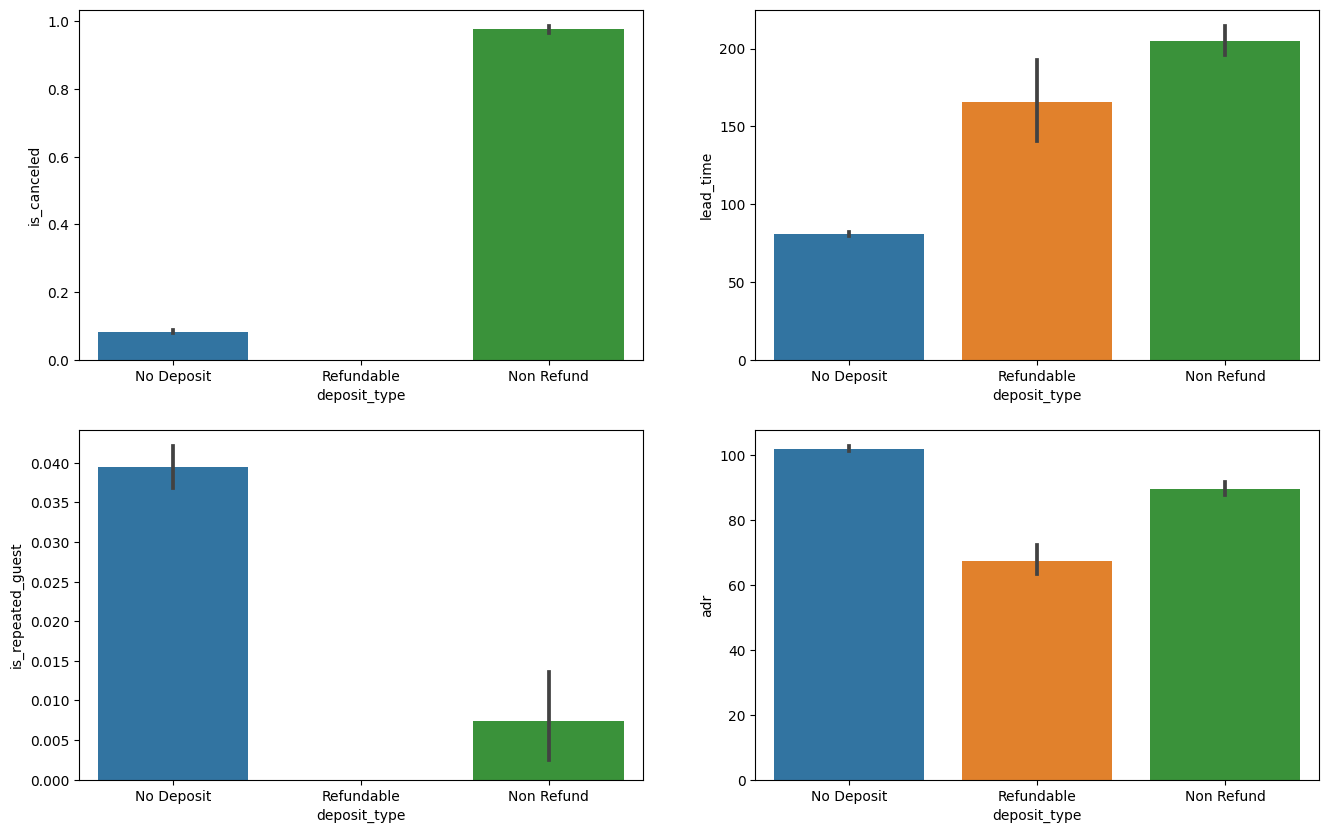

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.barplot(data=df,x=df.deposit_type,y=df.is_canceled,ax=axes[0][0])
sns.barplot(data=df,x=df.deposit_type,y=df.lead_time,ax=axes[0][1])
sns.barplot(data=df,x=df.deposit_type,y=df.is_repeated_guest,ax=axes[1][0])
sns.barplot(data=df,x=df.deposit_type,y=df.adr,ax=axes[1][1])
plt.show()

<ipython-input-30-154042c8fb64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True)


<Axes: >

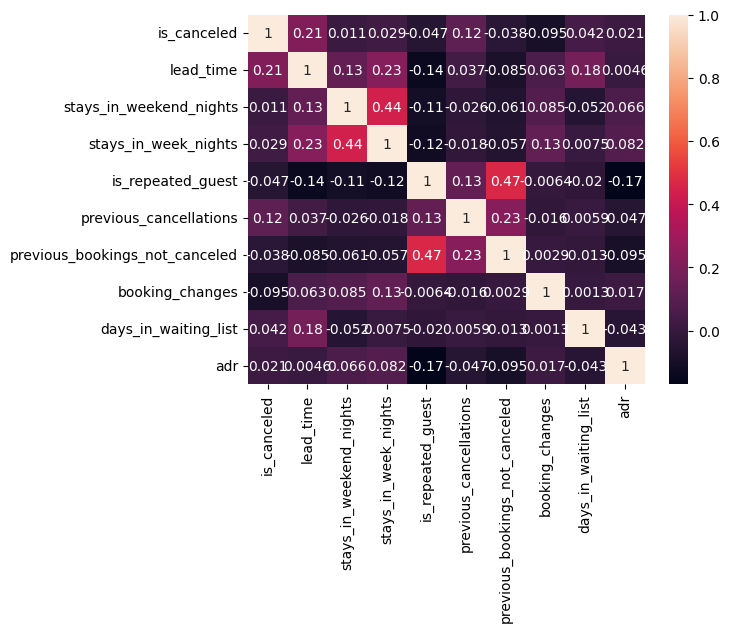

In [ ]:
sns.heatmap(df.corr(method='pearson'),annot=True)

In [ ]:
df.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [ ]:
print('lead_time 결측치 비율:', 5/len(df)*100,'%')  # '{}%'.format(5/len(df)*100)
print('is_repeated_guest 결측치 비율:', 358/len(df)*100)
print('adr 결측치 비율:', 1063/len(df)*100)

lead_time 결측치 비율: 0.025 %
is_repeated_guest 결측치 비율: 1.79
adr 결측치 비율: 5.315


In [ ]:
#결측치 비율 확인
# print('lead time 결측치 비율: {}%'.format(round(5 /len(hotel)*100, 2)))
# print('is repeated guest 결측치 비율: {}%'.format(round(358/len(hotel)*100, 2)))
# print('adr 결측치 비율: {}%'.format(round(1063 /len(hotel)*10.0, 2)))

In [ ]:
'{}'.format(5/len(df)*100)    #{}.format(5/len(df)*100)는 에러남

'0.025'

In [ ]:
'{}%'.format(5/len(df)*100)     '{}'.format()  format 안의 값을 {}가 산출해준다.

'0.025%'

In [ ]:
print(df.lead_time.median())
df.lead_time=df.lead_time.fillna(df.lead_time.median())


51.0


In [ ]:
df.lead_time.isnull().sum()

0

In [ ]:
print(df.adr.median())
adr_median=df.groupby('deposit_type')['adr'].median().to_frame()
adr_median

94.5


,adr
deposit_type,
No Deposit,95.0
Non Refund,89.0
Refundable,66.0


(array([1.196e+03, 6.500e+03, 7.151e+03, 2.680e+03, 9.360e+02, 3.500e+02,
        9.400e+01, 2.200e+01, 5.000e+00, 3.000e+00]),
 array([ -6.38 ,  39.408,  85.196, 130.984, 176.772, 222.56 , 268.348,
        314.136, 359.924, 405.712, 451.5  ]),
 <BarContainer object of 10 artists>)

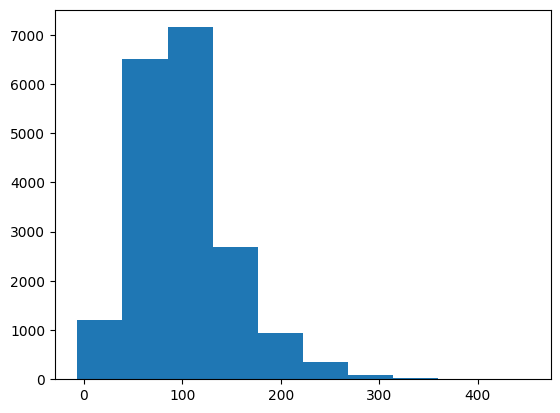

In [ ]:
plt.hist(df.adr)

In [ ]:
df.adr.head(20)

0     131.50
1      73.95
2        NaN
3      80.30
4      60.90
5      88.40
6     105.90
7      76.67
8      84.00
9      42.00
10     79.84
11       NaN
12     88.00
13    126.00
14       NaN
15     55.00
16    158.77
17     56.00
18    124.10
19    126.00
Name: adr, dtype: float64

In [ ]:
df[df.adr=='NaN']
# adr의 평균이 deposit_type 형태에 따라 달라 그에 맞추어 대치하려했으나 잘 안됨.
# https://steadiness-193.tistory.com/48

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr


In [ ]:
df.is_repeated_guest=df.is_repeated_guest.fillna(df.is_repeated_guest.median())
df.is_repeated_guest.isnull().sum()

0

In [ ]:
df.adr=df.adr.fillna(df.adr.median())
df.adr.isnull().sum()

0

In [ ]:
xx=df.drop(columns=['is_canceled','deposit_type'])
yy=df['is_canceled']

In [ ]:
melt_df=pd.melt(xx,var_name='col',value_name='value')
melt_df

,col,value
0,lead_time,105.0
1,lead_time,303.0
2,lead_time,33.0
3,lead_time,48.0
4,lead_time,216.0
...,...,...
179995,adr,62.0
179996,adr,130.0
179997,adr,100.0
179998,adr,209.0


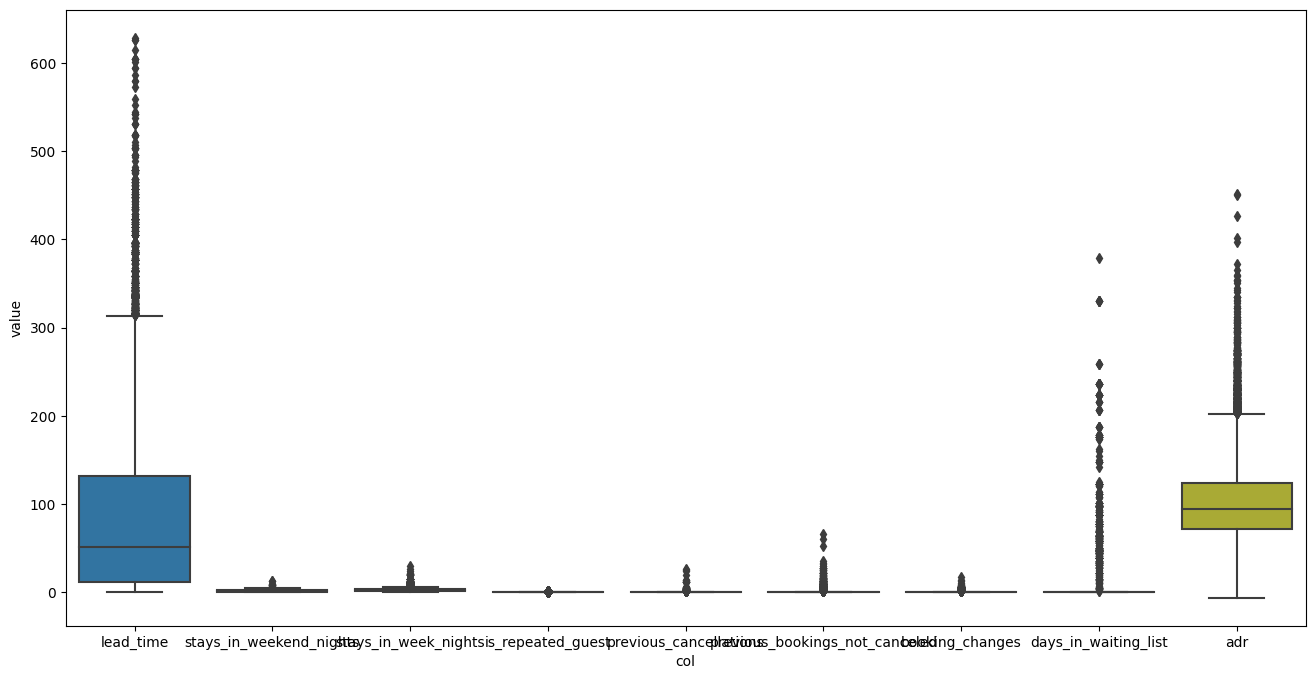

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='col',y='value',data=melt_df)
plt.show()

In [ ]:
# 이상치 발견 함수
# import numpy as np

# def outlier_remove(data, threshold=1.5):
# 	q1, q3 = np.percentile(data, [25, 75]) # 1사분위수, 3사분위수 계산
# 	IQR = q3 - q1 # IQR 계산

# 	lower_bound = q1 - (threshold * IQR) # Outlier 판단 Lower Bound 계산
# 	upper_bound = q3 + (threshold * IQR)  #Outlier 판단 Upper Bound 계산

# 	filtered_data = [x for x in data if x >= lower_bound and x <= upper_bound]
# 	outlier = [x for x in data if x not in filtered_data]

# 	return filtered_data, outlier, q1, q3, iqr, lower_bound, upper_bound

# if __name__ =='__main__':
# 	X = np.random.normal(0, 1000, 1000)
# 	filtered_data, outlier, q1, q3, IQR, lower_bound, upper_bound = outlier_remove(X)

In [ ]:
# 이상치 발견 함수
# def outlier_iqr(data, column):

#     # lower, upper 글로벌 변수 선언하기
#     global lower, upper

#     # 4분위수 기준 지정하기
#     q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

#     # IQR 계산하기
#     iqr = q75 - q25

#     # outlier cutoff 계산하기
#     cut_off = iqr * 1.5

#     # lower와 upper bound 값 구하기
#     lower, upper = q25 - cut_off, q75 + cut_off

#     print('IQR은',iqr, '이다.')
#     print('lower bound 값은', lower, '이다.')
#     print('upper bound 값은', upper, '이다.')

#     # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
#     data1 = data[data[column] > upper]
#     data2 = data[data[column] < lower]

#     # 이상치 총 개수 구하기
#     return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')


In [ ]:
q3_lead_time=df.lead_time.quantile(0.75)
q1_lead_time=df.lead_time.quantile(0.25)
iqr_lead_time=q3_lead_time-q1_lead_time
outlier_lead_time=df[(df.lead_time<q1_lead_time-1.5*iqr_lead_time)|(df.lead_time>q3_lead_time+1.5*iqr_lead_time)]
outlier_lead_time

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
14,0,No Deposit,377.0,0,2,0.000000,0,0,1,0,94.50
85,0,No Deposit,422.0,0,4,0.000000,0,0,6,0,90.00
164,0,No Deposit,316.0,0,3,0.000000,0,0,0,0,110.00
170,0,No Deposit,377.0,0,2,0.000000,0,0,0,0,115.00
227,0,No Deposit,338.0,1,2,0.000000,0,0,0,68,90.67
...,...,...,...,...,...,...,...,...,...,...,...
19923,1,Non Refund,545.0,0,2,0.038133,0,0,0,0,62.00
19927,1,Non Refund,364.0,0,2,0.000000,1,0,0,0,101.50
19934,1,Non Refund,334.0,0,2,0.000000,1,0,0,0,62.00
19942,1,Non Refund,336.0,0,2,0.000000,1,0,0,0,94.50


In [ ]:
outlier_lead_time.index

Int64Index([   14,    85,   164,   170,   227,   279,   281,   283,   290,
              329,
            ...
            19890, 19895, 19907, 19913, 19921, 19923, 19927, 19934, 19942,
            19961],
           dtype='int64', length=732)

In [ ]:
df.loc[outlier_lead_time.index,'lead_time']=round(df.lead_time.median(),2)
df.loc[outlier_lead_time.index,'lead_time']

14       51.0
85       51.0
164      51.0
170      51.0
227      51.0
         ... 
19923    51.0
19927    51.0
19934    51.0
19942    51.0
19961    51.0
Name: lead_time, Length: 732, dtype: float64

In [ ]:
q3_adr=df.adr.quantile(0.75)
q1_adr=df.adr.quantile(0.25)
iqr_adr=q3_adr-q1_adr
outlier_adr=df[(df.adr<q1_adr-1.5*iqr_adr)|(df.adr>q3_adr+1.5*iqr_adr)]
outlier_adr
outlier_adr.index
df.loc[outlier_adr.index,'adr']=round(df.adr.median(),2)

print(q3_adr)
print(q1_adr)
print(q1_adr-1.5*iqr_adr)
print(q3_adr+1.5*iqr_adr)
print(df.loc[outlier_adr.index,'adr'])

120.0
75.0
7.5
187.5
48       96.3
74       96.3
86       96.3
183      96.3
197      96.3
         ... 
19888    96.3
19913    96.3
19938    96.3
19944    96.3
19998    96.3
Name: adr, Length: 1082, dtype: float64


In [ ]:
df.loc[19997,'adr']

96.3

In [ ]:
xx=df.drop(columns=['is_canceled','deposit_type'])
yy=df['is_canceled']

In [ ]:
melt_df=pd.melt(xx,var_name='col',value_name='value')
melt_df

,col,value
0,lead_time,105.0
1,lead_time,303.0
2,lead_time,33.0
3,lead_time,48.0
4,lead_time,216.0
...,...,...
179995,adr,62.0
179996,adr,130.0
179997,adr,96.3
179998,adr,96.3


<Axes: xlabel='col', ylabel='value'>

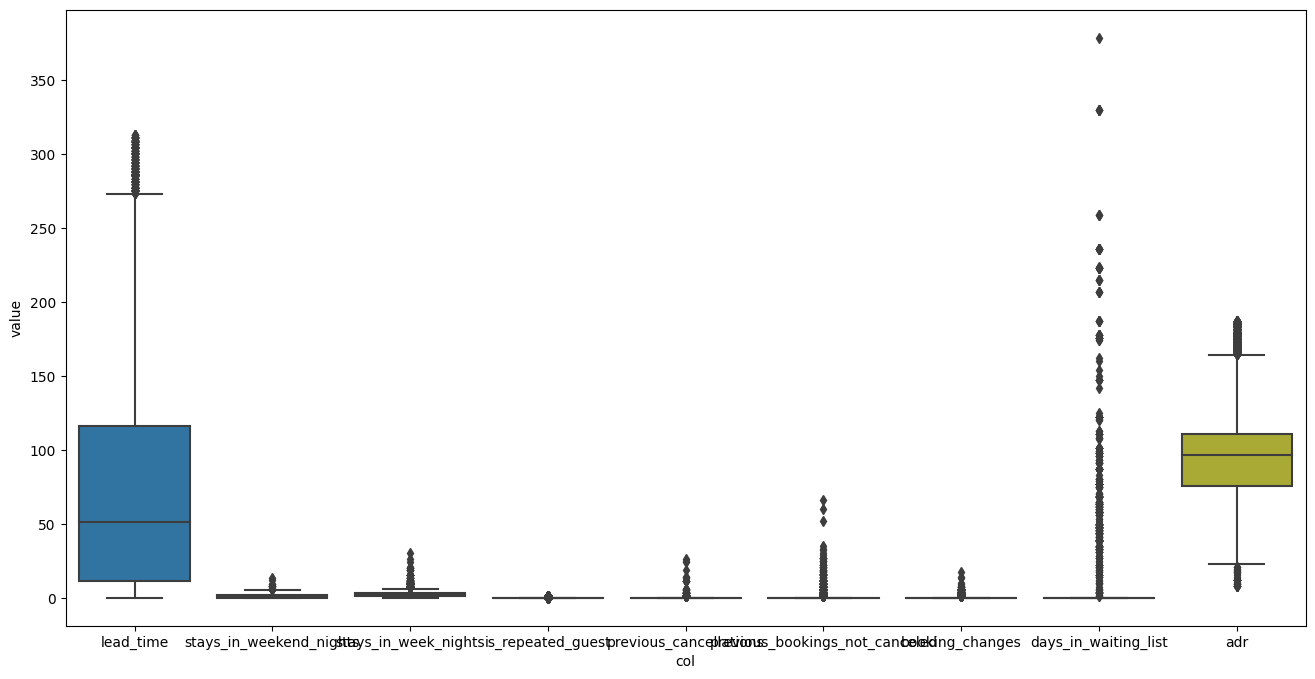

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='col',y='value',data=melt_df)  # 이상치가 왜 안 없어질까? 다 없어지지는 않나?

In [ ]:

ratio0 = round(len(df[df['is_canceled']==0])/len(df)*100, 2)
ratio1 = round(len(df[df['is_canceled']==1])/len(df)*100, 2)
print('0 비율: {}%'.format(ratio0))
print('1 비율: {}%'.format(ratio1))

In [ ]:
ratio_0=len(df[df.is_canceled==0])/len(df)*100
ratio_1=len(df[df.is_canceled==1])/len(df)*100

In [ ]:
print('0 비율:{}%'.format(ratio_0))
print('1 비율:{}%'.format(ratio_1))

0 비율:88.0%
1 비율:12.0%


<Axes: xlabel='is_canceled', ylabel='count'>

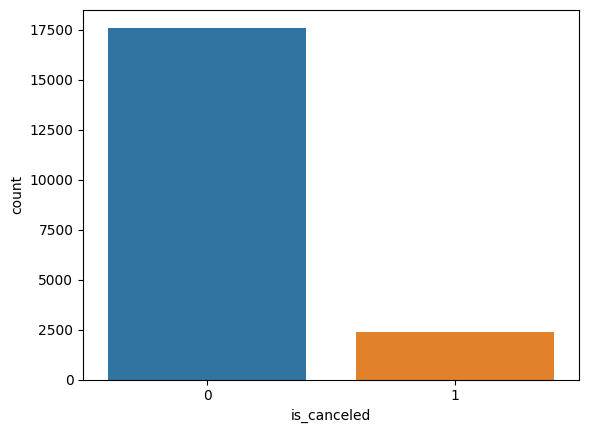

In [ ]:
sns.countplot(x='is_canceled',data=df)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
df=pd.get_dummies(df)
df.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable'],
      dtype='object')

In [ ]:
x=df.drop(columns=['is_canceled'])
y=df['is_canceled']

In [243]:
rf=RandomForestClassifier()


In [246]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 10710 to 18737
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       14000 non-null  float64
 1   stays_in_weekend_nights         14000 non-null  int64  
 2   stays_in_week_nights            14000 non-null  int64  
 3   is_repeated_guest               14000 non-null  float64
 4   previous_cancellations          14000 non-null  int64  
 5   previous_bookings_not_canceled  14000 non-null  int64  
 6   booking_changes                 14000 non-null  int64  
 7   days_in_waiting_list            14000 non-null  int64  
 8   adr                             14000 non-null  float64
 9   deposit_type_No Deposit         14000 non-null  uint8  
 10  deposit_type_Non Refund         14000 non-null  uint8  
 11  deposit_type_Refundable         14000 non-null  uint8  
dtypes: float64(3), int64(6), uin

train 정확도: 0.9904285714285714
분류표:               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5280
           1       0.76      0.46      0.58       720

    accuracy                           0.92      6000
   macro avg       0.85      0.72      0.77      6000
weighted avg       0.91      0.92      0.91      6000

시간: 2.0845041275024414 sec
roc: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7dcd274b4af0>


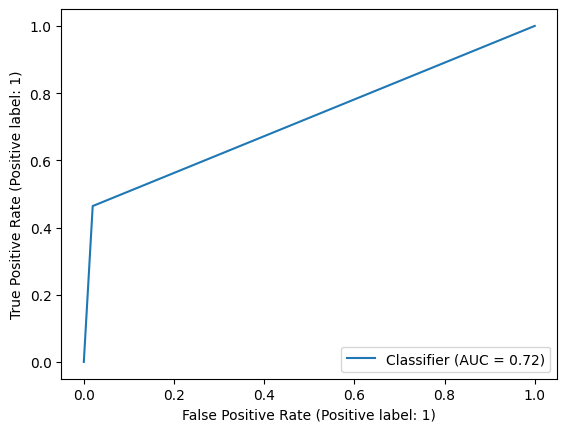

In [254]:
start=time.time()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, stratify =y, random_state =100)
rf.fit(x_train,y_train)
end=time.time()
print('train 정확도:',rf.score(x_train,y_train))
pred=rf.predict(x_test)
roc=RocCurveDisplay.from_predictions(y_test,pred)
print('분류표:',classification_report(y_test,pred))
print('시간:',end-start,'sec')
print('roc:',roc)

In [253]:
ro=RandomOverSampler()
# ro_x,ro_y=ro.fit_resample(x,y)
sm=SMOTE()
# sm_x,sm_y=sm.fit_resample(x,y)

train 정확도: 0.9873376623376623
분류표:               precision    recall  f1-score   support

           0       0.99      0.93      0.96      5280
           1       0.93      0.99      0.96      5280

    accuracy                           0.96     10560
   macro avg       0.96      0.96      0.96     10560
weighted avg       0.96      0.96      0.96     10560

시간: 4.712416172027588 sec
roc: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7dcd2ac33010>


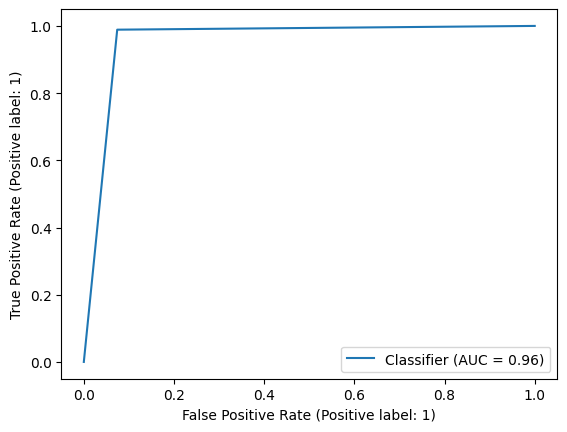

In [255]:
start=time.time()
ro_x,ro_y=ro.fit_resample(x,y)
ro_x_train,ro_x_test,ro_y_train,ro_y_test=train_test_split(ro_x,ro_y,test_size=0.3,stratify=ro_y,random_state=100)
rf.fit(ro_x_train,ro_y_train)
end=time.time()
print('train 정확도:',rf.score(ro_x_train,ro_y_train))
pred=rf.predict(ro_x_test)
roc=RocCurveDisplay.from_predictions(ro_y_test,pred)
print('분류표:',classification_report(ro_y_test,pred))
print('시간:',end-start,'sec')
print('roc:',roc)

train 정확도: 0.9926948051948052
분류표:               precision    recall  f1-score   support

           0       0.89      0.90      0.90      5280
           1       0.90      0.89      0.90      5280

    accuracy                           0.90     10560
   macro avg       0.90      0.90      0.90     10560
weighted avg       0.90      0.90      0.90     10560

시간: 4.956386089324951 sec
roc: <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7dcd27182890>


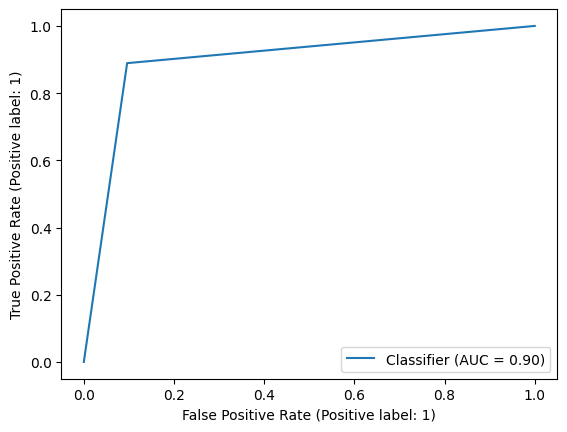

In [256]:
start=time.time()
sm_x,sm_y=sm.fit_resample(x,y)
sm_x_train,sm_x_test,sm_y_train,sm_y_test=train_test_split(sm_x,sm_y,test_size=0.3,stratify=sm_y,random_state=100)
rf.fit(sm_x_train,sm_y_train)
end=time.time()
print('train 정확도:',rf.score(sm_x_train,sm_y_train))
pred=rf.predict(sm_x_test)
roc=RocCurveDisplay.from_predictions(sm_y_test,pred)
print('분류표:',classification_report(sm_y_test,pred))
print('시간:',end-start,'sec')
print('roc:',roc)

In [257]:
rf.score(sm_x_test,sm_y_test)

0.8965909090909091

In [261]:
%%shell
jupyter nbconvert --to html /content/연습_3회기출.ipynb

[NbConvertApp] Converting notebook /content/연습_3회기출.ipynb to html
[NbConvertApp] Writing 2142102 bytes to /content/연습_3회기출.html
